In [1]:
!git clone https://github.com/mishrababhishek/flower_image_classification.git

Cloning into 'flower_image_classification'...
remote: Enumerating objects: 4334, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 4334 (delta 0), reused 13 (delta 0), pack-reused 4321
Receiving objects: 100% (4334/4334), 264.02 MiB | 17.99 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (4327/4327), done.


In [ ]:
import shutil

# Specify the source directory and destination directory
source_dir = '/content/flower_image_classification/flowers'  # Replace with the path to the source directory
destination_dir = '/content'  # Replace with the path to the destination directory

# Copy the entire source directory and its contents to the destination directory
shutil.copytree(source_dir, destination_dir,dirs_exist_ok=True)

'/content'

In [ ]:
shutil.rmtree("/content/flower_image_classification")

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='daisy'
FLOWER_SUNFLOWER_DIR='sunflower'
FLOWER_TULIP_DIR='tulip'
FLOWER_DANDI_DIR='dandelion'
FLOWER_ROSE_DIR='rose'


In [ ]:
def assign_label(img,flower_type):
    return flower_type


In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))




In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:01<00:00, 510.48it/s]

764


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))


100%|██████████| 733/733 [00:01<00:00, 415.29it/s]

1497


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 467.44it/s]

2481


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:02<00:00, 489.66it/s]

3533


In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 399.30it/s]

4317


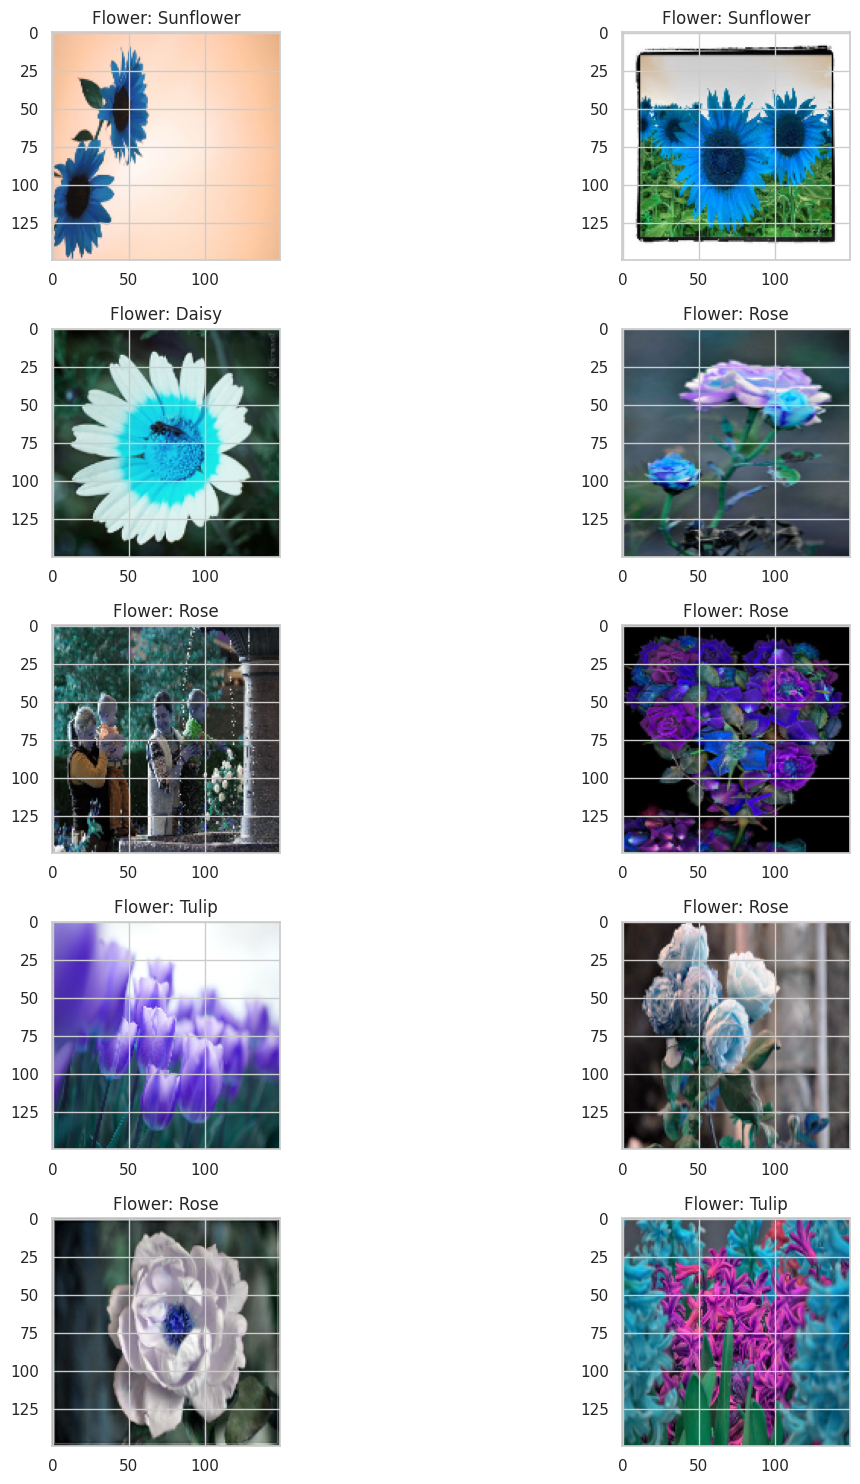

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])

plt.tight_layout()


In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [ ]:
# # modelling starts using a CNN.

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [ ]:
num_layers = len(model.layers)
print("Number of layers:", num_layers)

Number of layers: 12


In [ ]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
25/25 [==============================] - 31s 792ms/step - loss: 1.3814 - accuracy: 0.3721 - val_loss: 1.2489 - val_accuracy: 0.4630
Epoch 2/50
25/25 [==============================] - 18s 725ms/step - loss: 1.1801 - accuracy: 0.4953 - val_loss: 1.1252 - val_accuracy: 0.5278
Epoch 3/50
25/25 [==============================] - 18s 713ms/step - loss: 1.0991 - accuracy: 0.5577 - val_loss: 1.0514 - val_accuracy: 0.5657
Epoch 4/50
25/25 [==============================] - 17s 664ms/step - loss: 0.9800 - accuracy: 0.6137 - val_loss: 1.1448 - val_accuracy: 0.5481
Epoch 5/50
25/25 [==============================] - 18s 716ms/step - loss: 0.9430 - accuracy: 0.6298 - val_loss: 0.9453 - val_accuracy: 0.6333
Epoch 6/50
25/25 [==============================] - 17s 695ms/step - loss: 0.9236 - accuracy: 0.6362 - val_loss: 1.0110 - val_accuracy: 0.6130
Epoch 7/50
25/25 [==============================] - 17s 663ms/step - loss: 0.8628 - accuracy: 0.6648 - val_loss: 0.8595 - val_accuracy: 0.6639

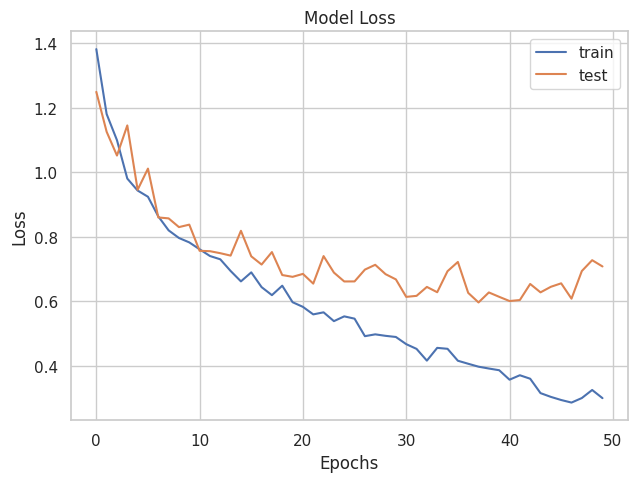

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

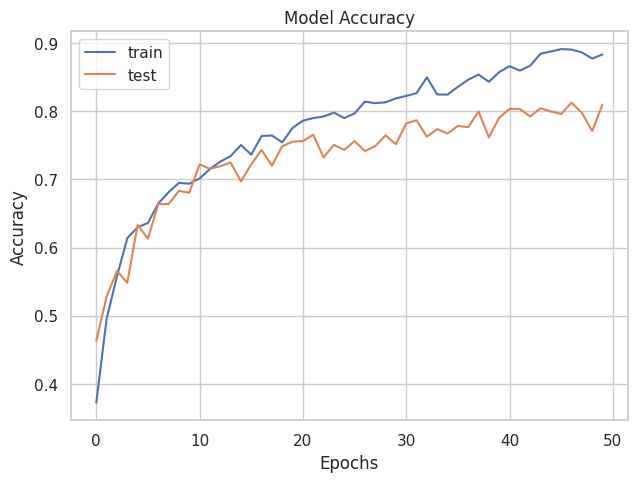

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


In [ ]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

34/34 [==============================] - 0s 11ms/step


In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [ ]:
model.save("flower_classifier.h5")

NameError: ignored

prediction code


In [9]:

import tensorflow as tf
import cv2
import numpy as np



In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
ml_model=('/content/drive/MyDrive/flower_classifier.h5')
model = tf.keras.models.load_model(ml_model)

In [12]:
IMG_SIZE=150
def model_prediction(img_path):
  img = cv2.imread(img_path, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
  img = np.array(img) / 255.0
  img = np.expand_dims(img, axis=0)

  pred = model.predict(img)

  return np.argmax(pred)

In [13]:
def decode_pred(pred_num):
  pred_dic = {0:'daisy', 1:'dandelion', 2:'rose', 3:'sunflower', 4:'tulip'}

  return pred_dic[pred_num]

In [14]:
pred_num = model_prediction('/content/flower_image_classification/flowers/rose/11233672494_d8bf0a3dbf_n.jpg')
print(decode_pred(pred_num))

1/1 [==============================] - 7s 7s/step
rose
